# Захаров Андрей Максимович
## Вариант 13

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

### 1. Вывести информацию о наборе данных.

In [261]:
df = pd.read_csv("Исходные данные.csv", low_memory=False)
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [262]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [263]:
df.shape

(100000, 28)

### 2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками. Num_of_Loan

In [264]:
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,-100
181,0
182,0
183,0
184,-100
185,-100
186,3
187,3
188,3
189,3


In [265]:
uniq = df["Num_of_Loan"].unique()
uniq

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [266]:
zamena = dict()

for i in uniq:
    if '_' in i and i not in zamena:
        correct = i.replace('_', '')
        zamena[i] = correct
        
zamena

{'0_': '0',
 '3_': '3',
 '2_': '2',
 '5_': '5',
 '8_': '8',
 '9_': '9',
 '4_': '4',
 '7_': '7',
 '1_': '1',
 '6_': '6',
 '597_': '597',
 '92_': '92',
 '1347_': '1347',
 '1185_': '1185',
 '235_': '235',
 '1459_': '1459',
 '1320_': '1320',
 '630_': '630',
 '359_': '359',
 '1225_': '1225',
 '131_': '131',
 '1311_': '1311',
 '1129_': '1129',
 '785_': '785',
 '143_': '143',
 '1131_': '1131',
 '27_': '27',
 '1171_': '1171',
 '227_': '227',
 '378_': '378',
 '1219_': '1219',
 '527_': '527',
 '1027_': '1027',
 '696_': '696',
 '1132_': '1132'}

In [267]:
df = df.replace({"Num_of_Loan" : zamena})
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1

In [268]:
for i in df["Num_of_Loan"]:
    try:
        int(i)
    except:
        print("Ошибка c", i)
else:
    print("Ошибочных данных нет")

Ошибочных данных нет


In [269]:
df.loc[df['Num_of_Loan'] < '0'] = np.nan
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,NaN
181,0
182,0
183,0
184,NaN
185,NaN
186,3
187,3
188,3
189,3


### 3. В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

In [270]:
df["Num_of_Loan"].isna().sum()

3876

In [271]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors='coerce')
print(df["Num_of_Loan"].dtypes)
df["Num_of_Loan"].isna().sum()

float64


3876

### 4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).

In [272]:
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months
6,22 Years and 7 Months
7,NaN
8,26 Years and 7 Months
9,26 Years and 8 Months


In [273]:
cha = list(map(lambda x: int(x.split()[0]) * 12 + int(x.split()[3]) if x is not np.NaN else x, df["Credit_History_Age"].tolist()))
cha

[265,
 nan,
 267,
 268,
 269,
 270,
 271,
 nan,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 213,
 214,
 215,
 nan,
 217,
 218,
 219,
 220,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 nan,
 368,
 369,
 nan,
 371,
 372,
 373,
 374,
 nan,
 nan,
 384,
 nan,
 386,
 387,
 nan,
 389,
 390,
 367,
 368,
 369,
 370,
 371,
 nan,
 373,
 374,
 nan,
 176,
 177,
 178,
 179,
 nan,
 181,
 182,
 nan,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 nan,
 318,
 319,
 320,
 321,
 nan,
 nan,
 324,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 nan,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 107,
 108,
 109,
 110,
 111,
 112,
 nan,
 114,
 218,
 219,
 220,
 221,
 222,
 nan,
 224,
 225,
 202,
 203,
 204,
 205,
 206,
 207,
 nan,
 209,
 350,
 351,
 352,
 nan,
 354,
 nan,
 356,
 357,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 218,
 219,
 nan,
 221,
 nan,
 223,
 224,
 225,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,


In [274]:
df["Credit_History_Age"] = cha
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
5,270.0
6,271.0
7,NaN
8,319.0
9,320.0


### 5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков. Заменить аномальные значения пропусками.

In [275]:
df[["Age"]].head(10)

,Age
0,23
1,23
2,-500
3,23
4,23
5,23
6,23
7,23
8,28_
9,28


In [276]:
ages = df["Age"].unique()
ages

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [277]:
z = dict()

for age in ages:
    if age is not np.nan and '_' in age:
        correct = age.replace('_', '')
        z[age] = correct

z

{'28_': '28',
 '34_': '34',
 '30_': '30',
 '24_': '24',
 '33_': '33',
 '35_': '35',
 '40_': '40',
 '37_': '37',
 '54_': '54',
 '21_': '21',
 '20_': '20',
 '43_': '43',
 '38_': '38',
 '18_': '18',
 '2111_': '2111',
 '46_': '46',
 '16_': '16',
 '19_': '19',
 '47_': '47',
 '53_': '53',
 '25_': '25',
 '27_': '27',
 '55_': '55',
 '42_': '42',
 '48_': '48',
 '49_': '49',
 '50_': '50',
 '32_': '32',
 '22_': '22',
 '17_': '17',
 '29_': '29',
 '15_': '15',
 '51_': '51',
 '31_': '31',
 '26_': '26',
 '39_': '39',
 '14_': '14',
 '36_': '36',
 '44_': '44',
 '7670_': '7670',
 '45_': '45',
 '23_': '23',
 '41_': '41',
 '52_': '52',
 '733_': '733',
 '5769_': '5769',
 '4383_': '4383',
 '56_': '56',
 '2650_': '2650',
 '3307_': '3307',
 '6962_': '6962',
 '5589_': '5589',
 '6556_': '6556',
 '1447_': '1447',
 '8153_': '8153',
 '3834_': '3834',
 '6744_': '6744',
 '6471_': '6471',
 '7723_': '7723',
 '6408_': '6408',
 '3502_': '3502',
 '7316_': '7316',
 '1102_': '1102',
 '8669_': '8669',
 '2463_': '2463',
 '30

In [278]:
df = df.replace({'Age' : z})
df[['Age']]

,Age
0,23
1,23
2,-500
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


In [279]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age']

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [280]:
df[(df['Age'] < 18) | (df['Age'] > 115)].shape

(8174, 28)

In [281]:
df.loc[(df['Age'] < 18) | (df['Age'] > 115), 'Age'] = np.nan
df[['Age']].head(10)

,Age
0,23.0
1,23.0
2,NaN
3,23.0
4,23.0
5,23.0
6,23.0
7,23.0
8,28.0
9,28.0


### 6. Восстановить пропущенные значения признака. Сравнить распределения признака до и после восстановления.

In [282]:
NoL = df['Num_of_Loan']
NoL_na = df['Num_of_Loan']
NoL = NoL.dropna()
NoL_na = NoL_na.fillna(-1)
df[['Num_of_Loan', 'Type_of_Loan', 'Monthly_Balance']].isna().sum()

Num_of_Loan         3876
Type_of_Loan       14867
Monthly_Balance     5034
dtype: int64

In [283]:
NoL_uniq, NoL_freq = np.unique(NoL, return_counts=True)
NoL_na_uniq, NoL_na_freq = np.unique(NoL_na, return_counts=True)

list(zip(NoL_uniq, NoL_freq)), list(zip(NoL_na_uniq, NoL_na_freq))

([(0.0, 10930),
  (1.0, 10606),
  (2.0, 15032),
  (3.0, 15104),
  (4.0, 14743),
  (5.0, 7197),
  (6.0, 7803),
  (7.0, 7344),
  (8.0, 3191),
  (9.0, 3702),
  (17.0, 1),
  (18.0, 1),
  (19.0, 1),
  (23.0, 2),
  (27.0, 1),
  (29.0, 1),
  (31.0, 2),
  (32.0, 1),
  (33.0, 2),
  (39.0, 1),
  (41.0, 1),
  (49.0, 2),
  (50.0, 2),
  (52.0, 1),
  (54.0, 1),
  (55.0, 1),
  (56.0, 1),
  (58.0, 2),
  (65.0, 1),
  (70.0, 1),
  (78.0, 1),
  (83.0, 1),
  (84.0, 1),
  (87.0, 1),
  (89.0, 1),
  (92.0, 1),
  (95.0, 2),
  (100.0, 1),
  (101.0, 1),
  (103.0, 1),
  (119.0, 1),
  (123.0, 1),
  (126.0, 1),
  (131.0, 1),
  (132.0, 1),
  (136.0, 1),
  (137.0, 1),
  (138.0, 1),
  (141.0, 2),
  (143.0, 2),
  (146.0, 1),
  (147.0, 1),
  (148.0, 1),
  (153.0, 1),
  (157.0, 1),
  (164.0, 1),
  (172.0, 2),
  (174.0, 1),
  (182.0, 1),
  (186.0, 1),
  (190.0, 1),
  (191.0, 1),
  (192.0, 2),
  (193.0, 1),
  (196.0, 1),
  (198.0, 1),
  (201.0, 1),
  (208.0, 1),
  (215.0, 1),
  (216.0, 1),
  (217.0, 2),
  (227.0, 2),
  (2

In [284]:
NoL_epmf = (NoL_freq / len(NoL)).round(3)
NoL_na_epmf = (NoL_na_freq / len(NoL_na)).round(3)

In [285]:
NoL_uniq = NoL_uniq[:10]
NoL_freq = NoL_freq[:10]
NoL_epmf = NoL_epmf[:10]
NoL_na_uniq = NoL_na_uniq[:11]
NoL_na_freq = NoL_na_freq[:11]
NoL_na_epmf = NoL_na_epmf[:11]
print(NoL_uniq)
print(NoL_freq)
print(NoL_epmf, NoL_epmf.sum())
print(NoL_na_uniq)
print(NoL_na_freq)
print(NoL_na_epmf, NoL_na_epmf.sum())


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10930 10606 15032 15104 14743  7197  7803  7344  3191  3702]
[0.114 0.11  0.156 0.157 0.153 0.075 0.081 0.076 0.033 0.039] 0.9940000000000001
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 3876 10930 10606 15032 15104 14743  7197  7803  7344  3191  3702]
[0.039 0.109 0.106 0.15  0.151 0.147 0.072 0.078 0.073 0.032 0.037] 0.994


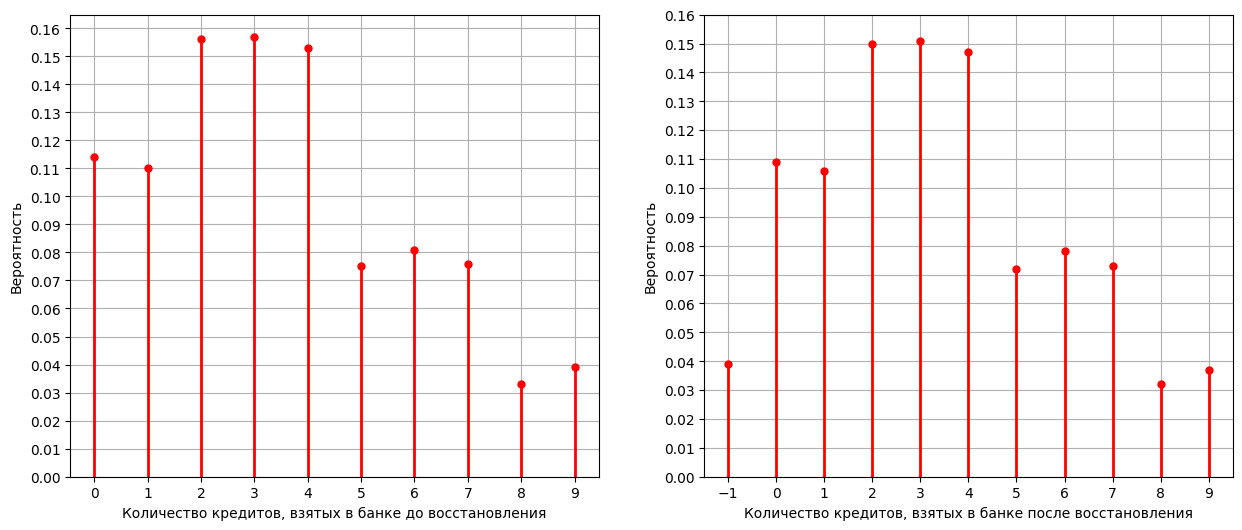

In [286]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(NoL_uniq, NoL_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(NoL_uniq, 0, NoL_epmf, colors='r', lw=2)
plt.xlabel('Количество кредитов, взятых в банке до восстановления')
plt.ylabel('Вероятность')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 0.17, 0.01))
plt.ylim(0)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(NoL_na_uniq, NoL_na_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(NoL_na_uniq, 0, NoL_na_epmf, colors='r', lw=2)
plt.xlabel('Количество кредитов, взятых в банке после восстановления')
plt.ylabel('Вероятность')
plt.xticks(np.arange(-1, 10, 1))
plt.yticks(np.arange(0, 0.17, 0.01))
plt.ylim(0)
plt.grid()

plt.show()

In [287]:
df['Monthly_Balance'].isna().sum()

5034

In [288]:
df[['Monthly_Balance']].head(10)

,Monthly_Balance
0,312.49408867943663
1,284.62916249607184
2,331.2098628537912
3,223.45130972736786
4,341.48923103222177
5,340.4792117872438
6,244.5653167062043
7,358.12416760938714
8,470.69062692529184
9,484.5912142650067


In [289]:
zamena = dict()

for i in df['Monthly_Balance']:
    if i is not np.nan and '_' in i:
        zamena[i] = np.nan

zamena

{'__-333333333333333333333333333__': nan}

In [290]:
df = df.replace({'Monthly_Balance' : zamena})

In [291]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = np.round(df['Monthly_Balance'], decimals=0)
df[['Monthly_Balance']].head(5)

,Monthly_Balance
0,312.0
1,285.0
2,331.0
3,223.0
4,341.0


In [292]:
MB = df['Monthly_Balance']
MB_na = df['Monthly_Balance']
MB.isna().sum()

5043

In [293]:
MB = MB.dropna()
mean = (df['Monthly_Balance'].mean()).round(0)
MB_na = MB_na.fillna(mean)
print(mean)
MB_uniq, MB_freq = np.unique(MB, return_counts=True)
MB_na_uniq, MB_na_freq = np.unique(MB_na, return_counts=True)

403.0


In [294]:
MB_epmf = (MB_freq / len(MB)).round(3)
MB_na_epmf = (MB_na_freq / len(MB_na)).round(3)

In [295]:
MB_filter = MB_epmf > 0.0
MB_na_filter = MB_epmf > 0.0
MB_uniq = MB_uniq[MB_filter]
MB_epmf = MB_epmf[MB_filter]
MB_na_uniq = MB_na_uniq[MB_na_filter]
MB_na_epmf = MB_na_epmf[MB_na_filter]

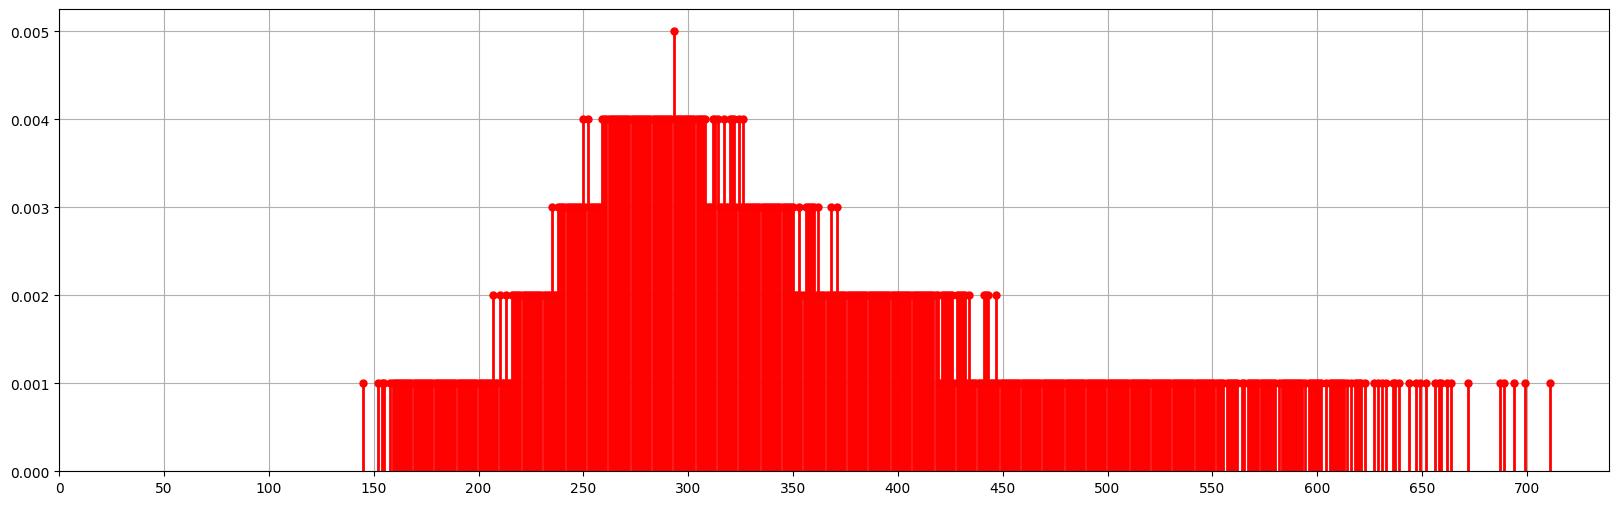

In [296]:
plt.figure(figsize=(20, 6))
plt.plot(MB_uniq, MB_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(MB_uniq, 0, MB_epmf, colors='r', lw=2)
plt.xticks(np.arange(0, 701, 50))
plt.ylim(0)
plt.grid()

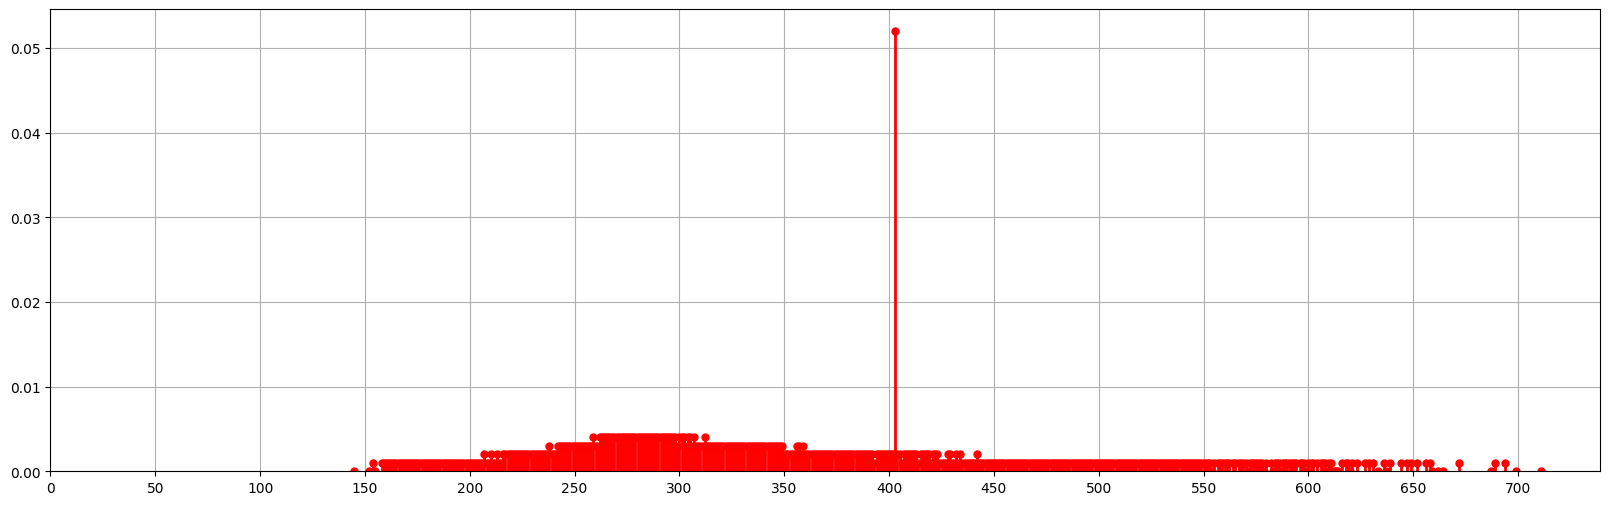

In [297]:
plt.figure(figsize=(20, 6))
plt.plot(MB_na_uniq, MB_na_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(MB_na_uniq, 0, MB_na_epmf, colors='r', lw=2)
plt.xticks(np.arange(0, 701, 50))
plt.ylim(0)
plt.grid()

In [298]:
df[['Type_of_Loan']].head()

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [299]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype('category')
ToL = df['Type_of_Loan'].cat.codes

In [300]:
ToL_uniq, ToL_freq = np.unique(ToL, return_counts=True)
ToL_epmf = (ToL_freq / len(ToL)).round(3)
ToL_epmf

array([0.149, 0.011, 0.   , ..., 0.002, 0.002, 0.002])

### 7. Определить наличие статистических выбросов. Использовать графический и статистический методы. Credit_Utilization_Ratio

In [301]:
df[['Credit_Utilization_Ratio']].head(10)

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
5,27.262259
6,22.537593
7,23.933795
8,24.464031
9,38.550848


In [302]:
type(df['Credit_Utilization_Ratio'][0])

numpy.float64

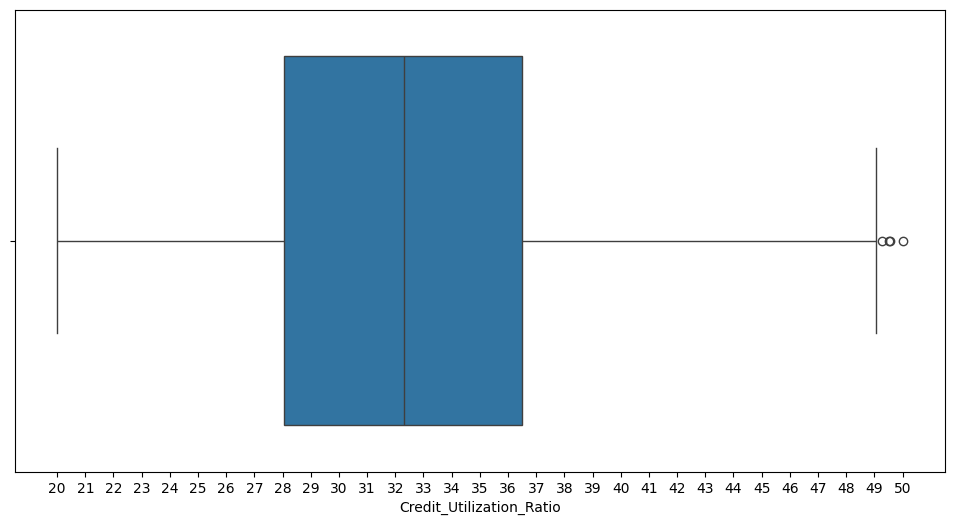

In [303]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Credit_Utilization_Ratio'])
plt.xticks(np.arange(20, 51, 1))
plt.show()

In [304]:
Q1 = df['Credit_Utilization_Ratio'].quantile(0.25)
Q3 = df['Credit_Utilization_Ratio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Credit_Utilization_Ratio'] < lower_bound) | (df['Credit_Utilization_Ratio'] > upper_bound)]
print("Выбросы:")
print(outliers['Credit_Utilization_Ratio'])

Выбросы:
9382     50.000000
17029    49.522324
62954    49.254983
68000    49.564519
Name: Credit_Utilization_Ratio, dtype: float64


### 8. Закодировать категориальные признаки. Occupation

In [305]:
df[['Occupation']].head(10)

,Occupation
0,Scientist
1,Scientist
2,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,_______
9,Teacher


In [306]:
df['Occupation'].unique().tolist()

['Scientist',
 '_______',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 nan,
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [307]:
df['Occupation'] = df['Occupation'].fillna('tmp')
df['Occupation'] = df['Occupation'].replace(['_______', 'tmp'], np.nan)
df['Occupation'] = df['Occupation'].fillna('No_Info')
df[['Occupation']].head(10)

,Occupation
0,Scientist
1,Scientist
2,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,No_Info
9,Teacher


In [308]:
categories = df['Occupation'].unique().tolist()
categories

['Scientist',
 'No_Info',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [309]:
occ = df[['Occupation']].copy()
occ = occ.astype({'Occupation' : 'category'})
occ.dtypes

Occupation    category
dtype: object

In [310]:
occ['Occupation'].cat.categories

Index(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'No_Info', 'Scientist', 'Teacher',
       'Writer'],
      dtype='object')

In [311]:
occ['Occupation_code'] = occ['Occupation'].cat.codes
occ.head(10)

,Occupation,Occupation_code
0,Scientist,13
1,Scientist,13
2,Scientist,13
3,Scientist,13
4,Scientist,13
5,Scientist,13
6,Scientist,13
7,Scientist,13
8,No_Info,12
9,Teacher,14


9. Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости. Credit_Utilization_Ratio

In [312]:
df[['Credit_Utilization_Ratio']].head(10)

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
5,27.262259
6,22.537593
7,23.933795
8,24.464031
9,38.550848


In [313]:
type(df['Credit_Utilization_Ratio'][0])

numpy.float64

In [314]:
df['Credit_Utilization_Ratio'].isna().sum()

3876

In [315]:
CUR = df['Credit_History_Age'].copy()
CUR = CUR.dropna()
CUR

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87433, dtype: float64

In [316]:
CUR = np.round(CUR, decimals=0)
CUR

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87433, dtype: float64

In [317]:
CUR = CUR.astype(np.int64)

In [318]:
CUR_uniq, CUR_freq = np.unique(CUR, return_counts=True)

In [319]:
CUR_epmf = (CUR_freq / len(CUR)).round(3)

In [320]:
CUR_t = sts.randint.rvs(1, 405, size=len(CUR))

In [321]:
CUR_t_empf = sts.randint.pmf(CUR_t, 1, 405)
CUR_t_empf

array([0.00247525, 0.00247525, 0.00247525, ..., 0.00247525, 0.00247525,
       0.00247525])

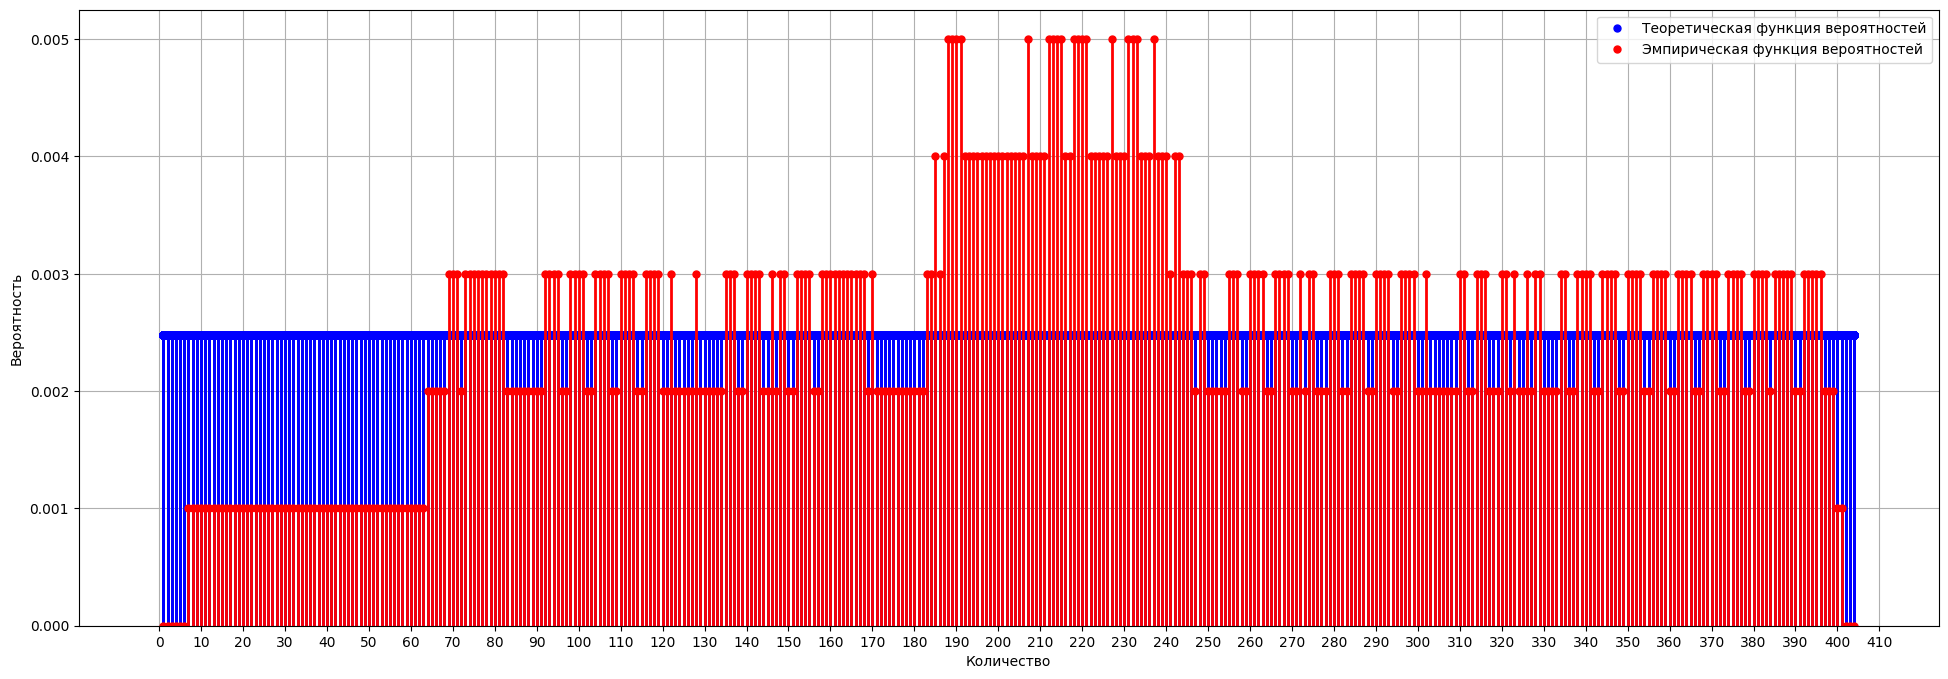

In [322]:
plt.figure(figsize=(24, 8))
plt.plot(CUR_t, CUR_t_empf, 'bo', ms=5, label='Теоретическая функция вероятностей')
plt.vlines(CUR_t, 0, sts.randint.pmf(CUR, 1, 405), colors='b', lw=2)

plt.plot(CUR_uniq, CUR_epmf, 'ro', ms=5, label='Эмпирическая функция вероятностей')
plt.vlines(CUR_uniq, 0, CUR_epmf, colors='r', lw=2)

plt.xticks(np.arange(0, 411, 10))
plt.legend()
plt.ylabel('Вероятность')
plt.xlabel('Количество')
plt.ylim(0)
plt.grid()
plt.show()

### 10. Выбрать любые два количественных признака и оценить наличие и степень их зависимости.
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла.
Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.

Interest_Rate: процентная ставка по кредитной карте
Credit_Utilization_Ratio: коэффициент использования кредитной карты

In [323]:
tmp = df[['Monthly_Inhand_Salary', 'Monthly_Balance']].copy()
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1824.843333,312.0
1,NaN,285.0
2,NaN,331.0
3,NaN,223.0
4,1824.843333,341.0
5,NaN,340.0
6,1824.843333,245.0
7,1824.843333,358.0
8,3037.986667,471.0
9,3037.986667,485.0


In [324]:
tmp.isna().sum()

Monthly_Inhand_Salary    18297
Monthly_Balance           5043
dtype: int64

In [325]:
tmp = tmp.dropna().reset_index(drop=True)
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1824.843333,312.0
1,1824.843333,341.0
2,1824.843333,245.0
3,1824.843333,358.0
4,3037.986667,471.0
5,3037.986667,485.0
6,3037.986667,466.0
7,3037.986667,445.0
8,3037.986667,482.0
9,3037.986667,356.0


In [326]:
tmp.corr()

,Monthly_Inhand_Salary,Monthly_Balance
Monthly_Inhand_Salary,1.000000,0.703844
Monthly_Balance,0.703844,1.000000


In [327]:
type(tmp['Monthly_Balance'][0])

numpy.float64

In [328]:
tmp['Monthly_Inhand_Salary'] = np.round(tmp['Monthly_Inhand_Salary'], decimals=0)

In [329]:
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1825.0,312.0
1,1825.0,341.0
2,1825.0,245.0
3,1825.0,358.0
4,3038.0,471.0
5,3038.0,485.0
6,3038.0,466.0
7,3038.0,445.0
8,3038.0,482.0
9,3038.0,356.0


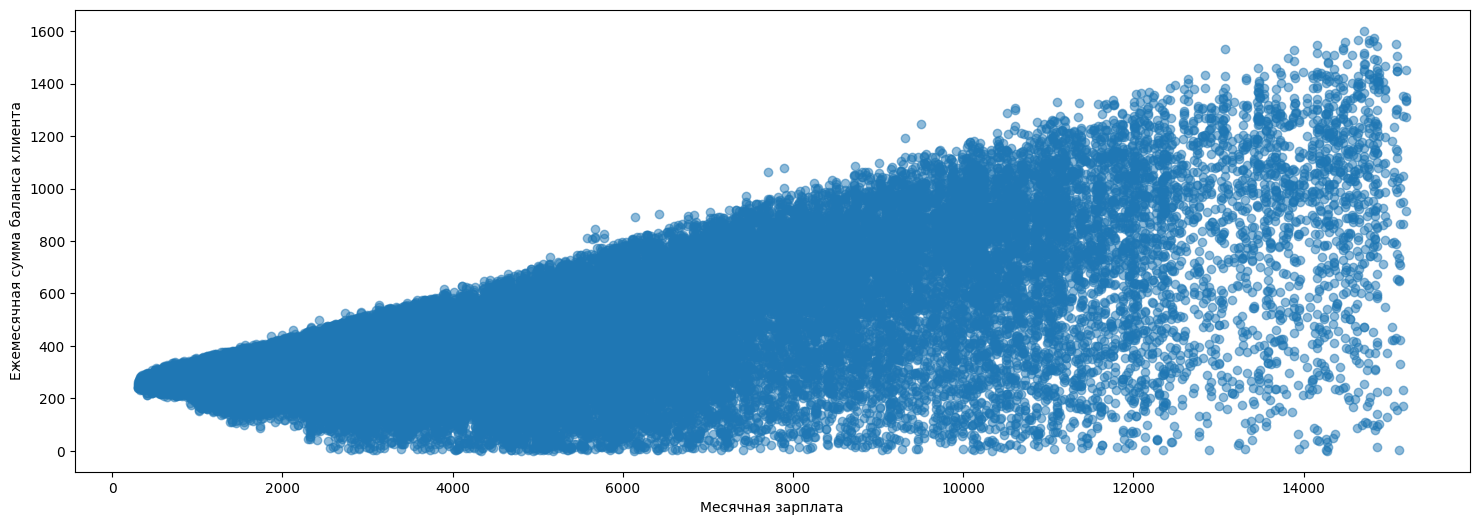

In [330]:
plt.figure(figsize=(18, 6))
plt.scatter(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance'], alpha=0.5)
plt.xlabel('Месячная зарплата')
plt.ylabel('Ежемесячная сумма баланса клиента')
plt.show()

In [331]:
def pearson_corr(x, y):
    return np.corrcoef(x, y)[0, 1]

def spearman_corr(x, y):
    return sts.spearmanr(x, y)[0]

def kendall_corr(x, y):
    return sts.kendalltau(x, y)[0]

In [332]:
print('Pearson:', pearson_corr(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))
print('Spearman:', spearman_corr(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))
print('Kendall:', kendall_corr(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))

Pearson: 0.7038435015631945
Spearman: 0.5980393319866205
Kendall: 0.45116275198637334


### 11. Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости. Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод. Написать функцию для расчета корреляционного отношения. Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.

In [333]:
tmp = df[['Occupation', 'Credit_Utilization_Ratio']].copy()
tmp.head(10)

,Occupation,Credit_Utilization_Ratio
0,Scientist,26.822620
1,Scientist,31.944960
2,Scientist,28.609352
3,Scientist,31.377862
4,Scientist,24.797347
5,Scientist,27.262259
6,Scientist,22.537593
7,Scientist,23.933795
8,No_Info,24.464031
9,Teacher,38.550848


In [334]:
tmp.isna().sum()

Occupation                     0
Credit_Utilization_Ratio    3876
dtype: int64

In [335]:
type(tmp['Credit_Utilization_Ratio'][0])

numpy.float64

In [336]:
tmp = tmp.dropna().reset_index(drop=True)
tmp.head()

,Occupation,Credit_Utilization_Ratio
0,Scientist,26.822620
1,Scientist,31.944960
2,Scientist,28.609352
3,Scientist,31.377862
4,Scientist,24.797347


In [238]:
credit = tmp['Credit_Utilization_Ratio']
credit_uniq, credit_freq = np.unique(credit, return_counts=True)
credit_epmf = (credit_freq / len(credit)).round(3)

In [337]:
occ_uniq, occ_freq = np.unique(tmp['Occupation'], return_counts=True)
occ_epmf = (occ_freq / len(tmp['Occupation'])).round(3)
print(occ_uniq)
print(occ_freq)
print(occ_epmf)

['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'No_Info' 'Scientist' 'Teacher' 'Writer']
[6036 6097 5981 5842 6080 5940 5859 6318 5743 6065 5946 5694 6777 6069
 5993 5684]
[0.063 0.063 0.062 0.061 0.063 0.062 0.061 0.066 0.06  0.063 0.062 0.059
 0.071 0.063 0.062 0.059]


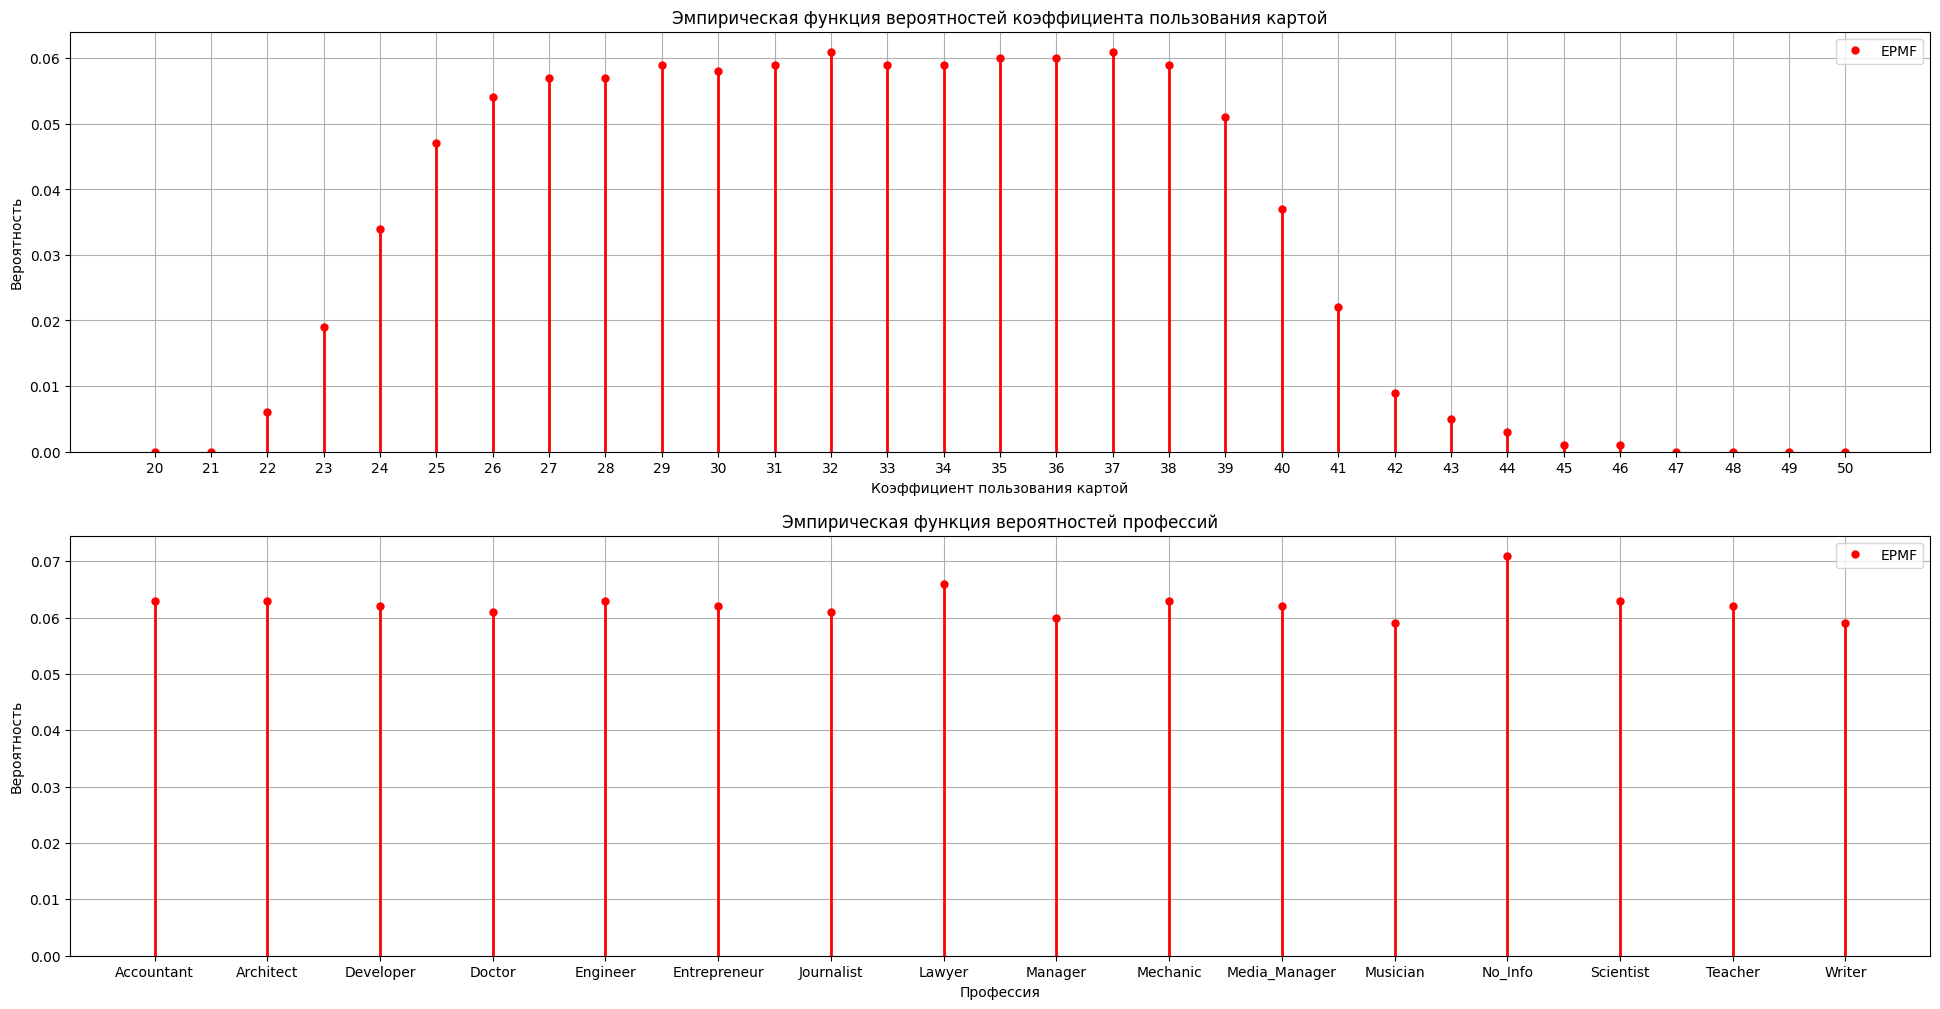

In [344]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 1, 1)
plt.plot(credit_uniq, credit_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(credit_uniq, 0, credit_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей коэффициента пользования картой')
plt.xlabel('Коэффициент пользования картой')
plt.ylabel('Вероятность')
plt.legend()
plt.xticks(np.arange(20, 51, 1))
plt.ylim(0)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(occ_uniq, occ_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(occ_uniq, 0, occ_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей профессий')
plt.xlabel('Профессия')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

plt.show()

In [247]:
tmp_x = list()
occupations = tmp['Occupation'].unique().tolist()

for i in occupations:
    tmp_x.append(tmp['Credit_Utilization_Ratio'][tmp['Occupation'] == i])

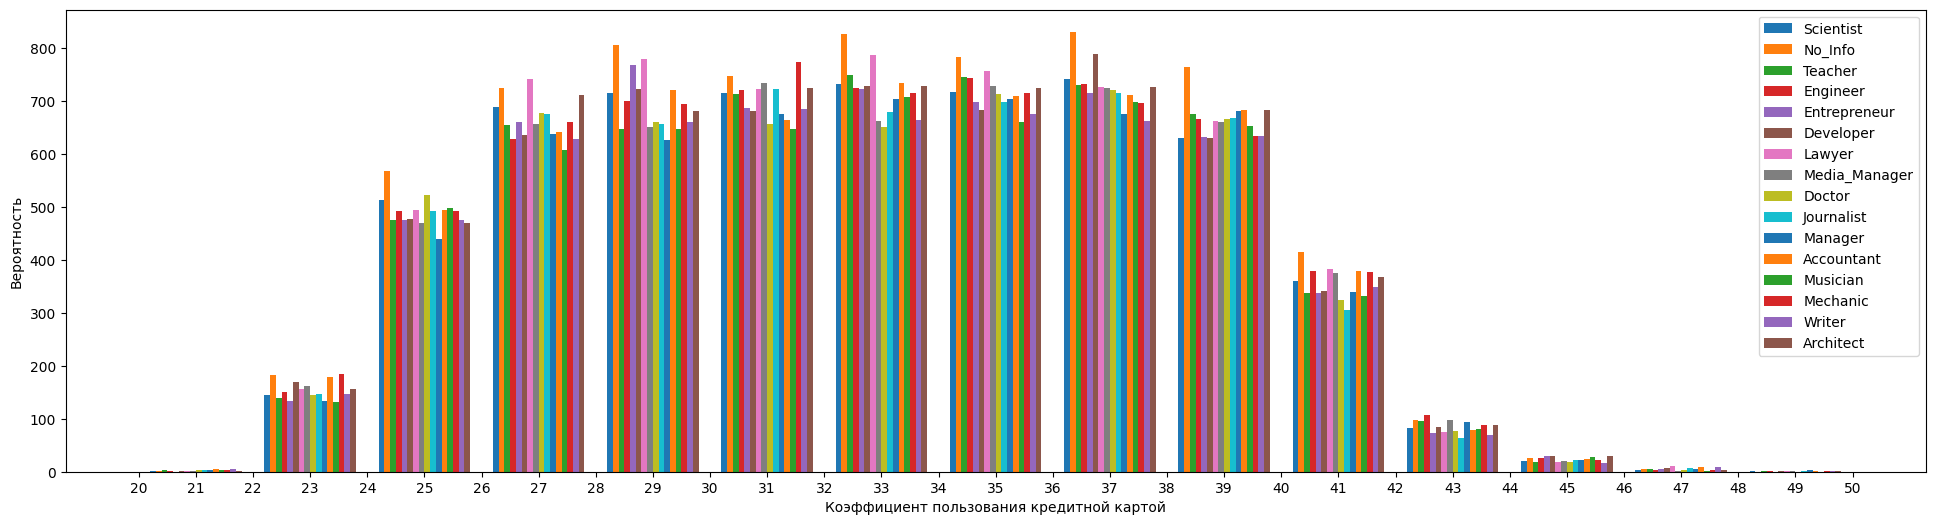

In [153]:
plt.figure(figsize=(24, 6))
plt.hist(tmp_x, bins=15)
plt.xticks(np.arange(20, 51, 1))
plt.xlabel('Коэффициент пользования кредитной картой')
plt.ylabel('Вероятность')
plt.legend(tmp['Occupation'].unique())
plt.show()

In [249]:
from statsmodels.distributions.empirical_distribution import ECDF

tmp_ecdf = list()

for i in occupations:
    tmp_ecdf.append(ECDF(tmp['Credit_Utilization_Ratio'][tmp['Occupation'] == i]))

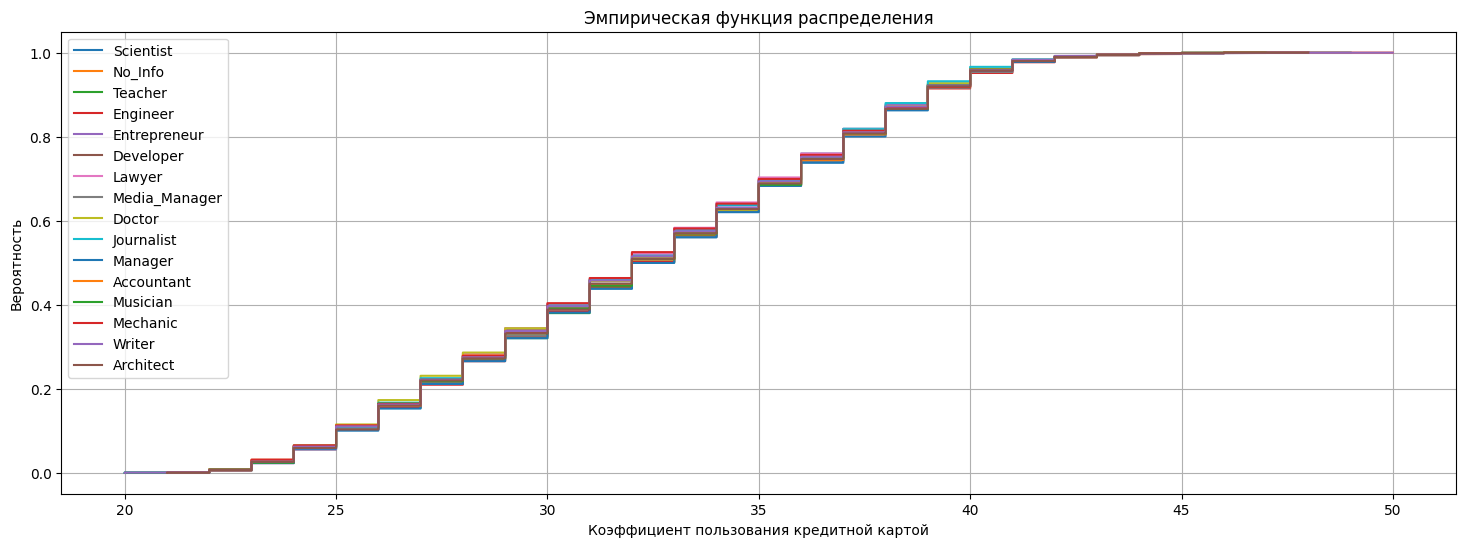

In [259]:
plt.figure(figsize=(18, 6))
for i in tmp_ecdf:
    plt.step(i.x, i.y)
plt.title('Эмпирическая функция распределения')
plt.ylabel('Вероятность')
plt.xlabel('Коэффициент пользования кредитной картой')
plt.legend(tmp['Occupation'].unique())
plt.grid()
plt.show()

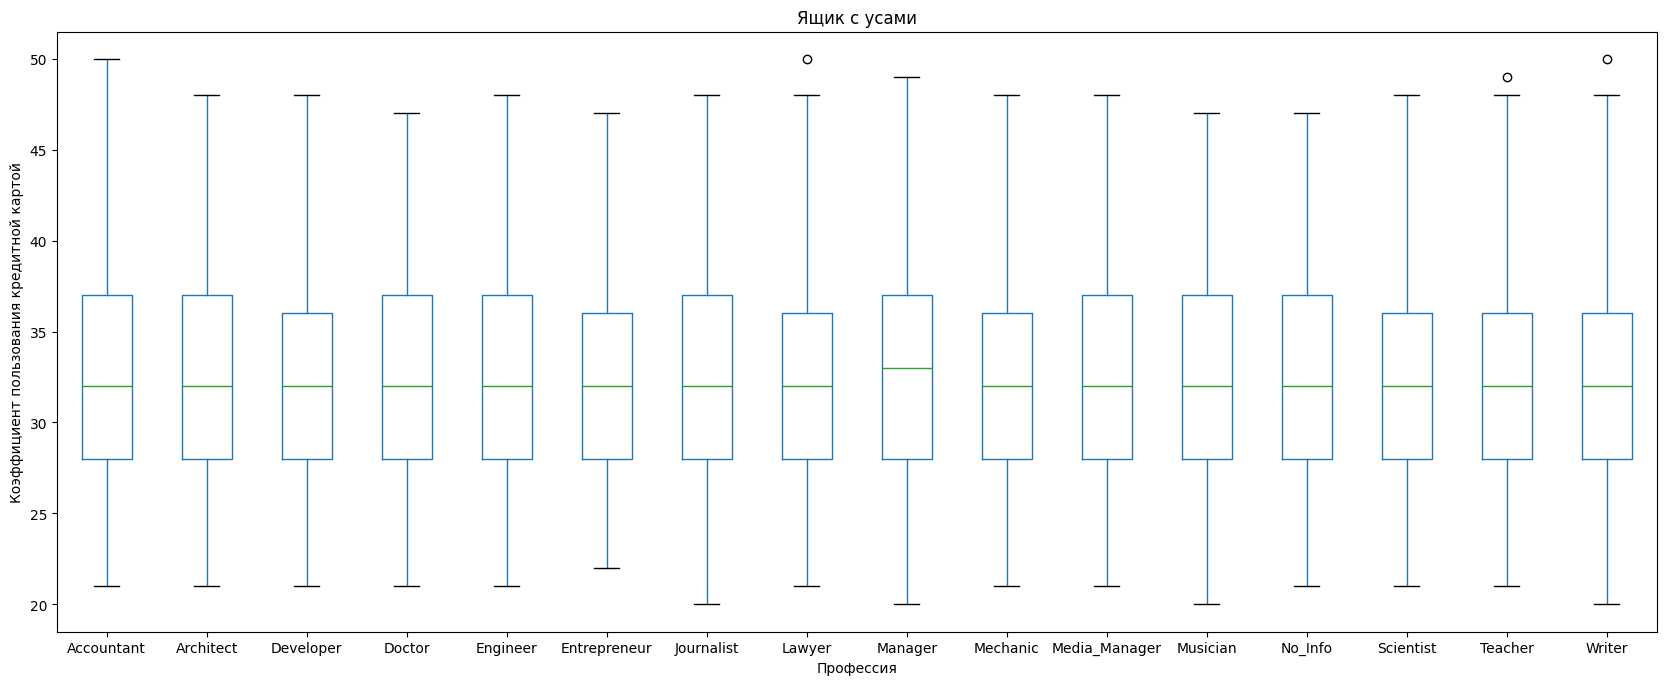

In [258]:
tmp.boxplot(column='Credit_Utilization_Ratio', by='Occupation', grid=False, figsize=(20, 8))
plt.title('Ящик c усами')
plt.suptitle('')
plt.xlabel('Профессия')
plt.ylabel('Коэффициент пользования кредитной картой')
plt.show()

In [346]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
        
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    eta = np.sqrt(numerator / denominator)
    
    return eta

In [348]:
tmp['Occupation'] = tmp['Occupation'].astype('category')
tmp['Occupation_code'] = tmp['Occupation'].cat.codes
tmp.head()

,Occupation,Credit_Utilization_Ratio,Occupation_codes,Occupation_code
0,Scientist,26.822620,13,13
1,Scientist,31.944960,13,13
2,Scientist,28.609352,13,13
3,Scientist,31.377862,13,13
4,Scientist,24.797347,13,13


In [349]:
print(correlation_ratio(tmp['Occupation_code'], tmp['Credit_Utilization_Ratio']))

0.015550511883806717


### 12. Выбрать любые два категориальных признака и оценить наличие и степень их зависимости. Провести визуальный анализ зависимости. Сделать вывод. Написать функции для расчета коэффициента ассоциации, коэффициента контингенции, коэффициента взаимной сопряженности Чупрова, коэффициента взаимной сопряженности Пирсона. Вычислить требуемые коэффициенты с использованием написанных функций. Сделать вывод.
 
Payment_Behaviour: платежное поведение клиента 
Credit_Score: кредитная оценка клиента

In [ ]:
tmp = df[['Payment_Behaviour', 'Credit_Score']].copy()
tmp.head(15)

,Payment_Behaviour,Credit_Score
0,High_spent_Small_value_payments,Good
1,Low_spent_Large_value_payments,Good
2,Low_spent_Medium_value_payments,Good
3,Low_spent_Small_value_payments,Good
4,High_spent_Medium_value_payments,Good
5,!@9#%8,Good
6,Low_spent_Small_value_payments,Good
7,High_spent_Medium_value_payments,Standard
8,Low_spent_Small_value_payments,Standard
9,High_spent_Large_value_payments,Good


In [ ]:
print(tmp['Payment_Behaviour'].unique())
print(tmp['Credit_Score'].unique())

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments' nan]
['Good' 'Standard' nan 'Poor']


In [ ]:
tmp.loc[tmp['Payment_Behaviour'] == '!@9#%8', 'Payment_Behaviour'] = np.nan

In [ ]:
tmp = tmp.dropna().reset_index(drop=True)

In [ ]:
tmp = tmp.astype({'Payment_Behaviour' : 'category', 'Credit_Score' : 'category'})

In [ ]:
PB_codes = tmp['Payment_Behaviour'].cat.codes
CS_codes = tmp['Credit_Score'].cat.codes

print(PB_codes.unique())
print(tmp['Payment_Behaviour'].cat.categories)

print(CS_codes.unique())
print(tmp['Credit_Score'].cat.categories)

[2 3 4 5 1 0]
Index(['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments'],
      dtype='object')
[0 2 1]
Index(['Good', 'Poor', 'Standard'], dtype='object')


In [ ]:
conf_matr = pd.crosstab(tmp['Payment_Behaviour'], tmp['Credit_Score'])
conf_matr

Credit_Score,Good,Poor,Standard
Payment_Behaviour,,,
High_spent_Large_value_payments,3032,2866,7253
High_spent_Medium_value_payments,3394,4249,9216
High_spent_Small_value_payments,2010,2987,5889
Low_spent_Large_value_payments,1804,2830,5425
Low_spent_Medium_value_payments,2381,4067,6881
Low_spent_Small_value_payments,3132,8771,12638


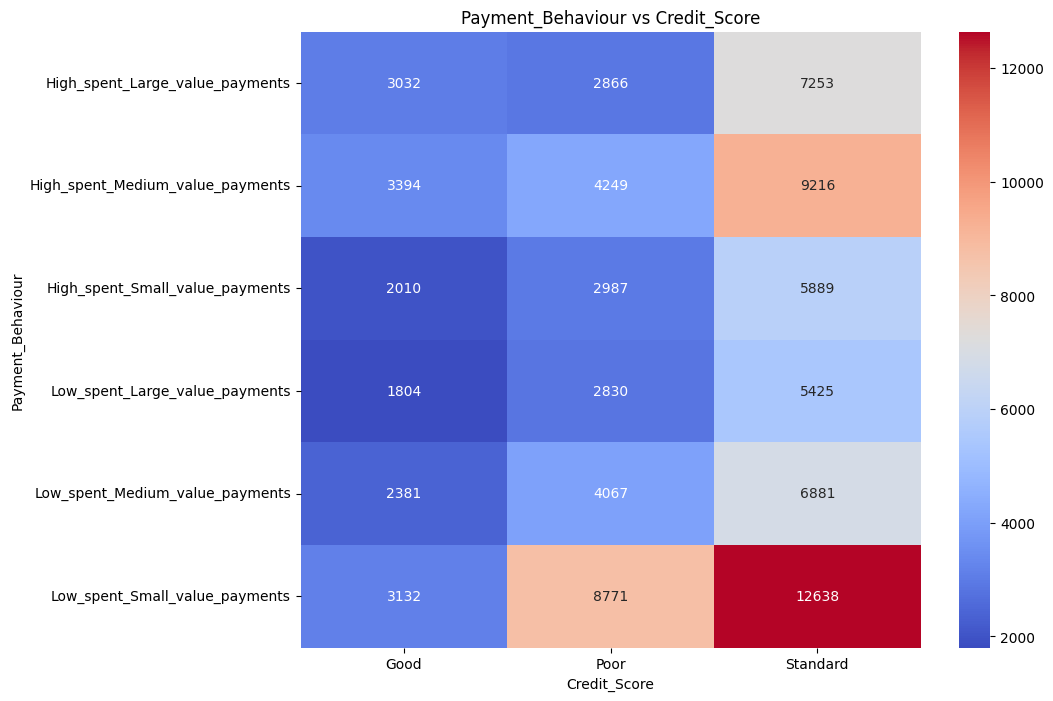

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matr, annot=True, fmt='d', cmap='coolwarm')
plt.title('Payment_Behaviour vs Credit_Score')
plt.ylabel('Payment_Behaviour')
plt.xlabel('Credit_Score')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


def pearson_contingency(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (chi2 + n))


def t_contingency(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k, r = confusion_matrix.shape
    return np.sqrt(chi2 / (n * np.sqrt((k - 1) * (r - 1))))

In [ ]:
print(cramers_v(conf_matr))
print(pearson_contingency(conf_matr))
print(t_contingency(conf_matr))

0.0879583424871106
0.12344052825938072
0.06995069513086627
